# Práctica 7: Regresión múltiple con statsmodels.

El objetivo de esta práctica es encontrar por lo menos un modelo de regresión múltiple para intentar tomar los resultados como un clasificador de una variable de interés en el proyecto.

Para los datos que se han utilizado a lo largo de este trabajo, el dato de mayor interés y en el que se basa uno de los principales objetivos que se tenían en la práctica 1, es la de clasificar entre anomalías benignas y malignas.

Regresando a las prácticas anteriores, se puede ver que las características que se describen en las columnas entre las anomalías malignas y benignas muchas veces se cruzan, por lo que no es posible hacer una regresión lineal simple para la clasificación. En esta práctica se utilizaran herramientas de statsmodels para poder hacer un clasificador decente.

Primeramente, y para poder utilizar la columna de diagnostico contra las demás columnas que se han estado utilizando, se convierte la M por un 1 y la B por un 0. De esta manera, podemos interactuar con la columna de diagnostico como nuestro dato objetivo.

Después se toman las dos columnas que resultaron ser mas contundentes en la práctica anterior, las cuales son 'Radius_mean' y 'Radius_worst'.

In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/bp_w-data.csv")
o.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

dim = pd.concat([o.loc[o.diagnosis == 1], o.loc[~isnan(o.radius_mean)]]) 
dib = pd.concat([o.loc[o.diagnosis == 0], o.loc[~isnan(o.radius_mean)]])

for datos in [dim, dib]:
    d = pd.DataFrame(datos, columns = ["diagnosis", "radius_mean", "radius_worst"])
    d = d.dropna() 
    n = len(d)
    if n >= 8: 
        y = d["diagnosis"]
        x = d[["radius_mean", "radius_worst"]]
        x = sm.add_constant(x)
        m = sm.OLS(y, x).fit() 
        print(datos.diagnosis.unique()[0])
        print(m.summary())

1
                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     502.5
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          7.75e-141
Time:                        17:24:43   Log-Likelihood:                -240.10
No. Observations:                 781   AIC:                             486.2
Df Residuals:                     778   BIC:                             500.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6502      0.053    -12.225 

Una vez que se tienen estos datos, se puede seguir a ver la relevancia que tienen estas columnas en contraste contra el diagnóstico, algo que no se había realizado en prácticas anteriores.

Se separa los datos de las anomalías malignas y benignas, para ver si el resultado es diferente.

              diagnosis  radius_mean  radius_worst
diagnosis      1.000000     0.707661      0.748644
radius_mean    0.707661     1.000000      0.965054
radius_worst   0.748644     0.965054      1.000000
              diagnosis  radius_mean  radius_worst
diagnosis       1.00000     0.714760      0.771940
radius_mean     0.71476     1.000000      0.971174
radius_worst    0.77194     0.971174      1.000000


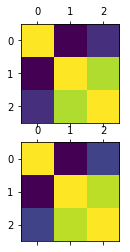

In [4]:
f = plt.figure()  
d = dim
d = pd.DataFrame(d, columns = ["diagnosis", "radius_mean", "radius_worst"])
d = d.dropna() 
print(d.corr())
sf = f.add_subplot(211)
tmp = sf.matshow(d.corr())

d = dib
d = pd.DataFrame(d, columns = ["diagnosis", "radius_mean", "radius_worst"])
d = d.dropna() 
print(d.corr())
sf = f.add_subplot(212)
tmp = sf.matshow(d.corr())

569
                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     445.5
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          6.16e-117
Time:                        17:24:52   Log-Likelihood:                -124.87
No. Observations:                 569   AIC:                             255.7
Df Residuals:                     566   BIC:                             268.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7553      0.059    -12.82

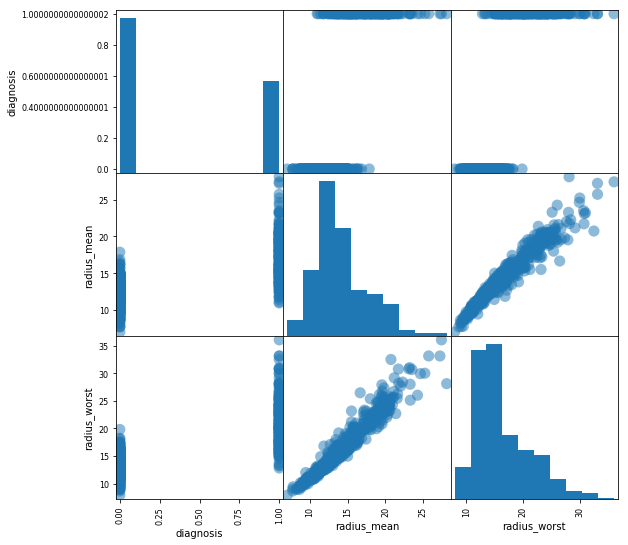

In [5]:

d = pd.DataFrame(o, columns = ["diagnosis", "radius_mean", "radius_worst"])
d = d.dropna()
print(len(d))
tmp = pd.plotting.scatter_matrix(d, figsize = (9, 9), s = 500) 
y = d["diagnosis"]
x = d[["radius_mean", "radius_worst"]]
x = sm.add_constant(x) 
m = sm.OLS(y, x).fit()  
print(m.summary())


926
                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     744.6
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          2.86e-193
Time:                        14:21:26   Log-Likelihood:                -66.178
No. Observations:                 926   AIC:                             138.4
Df Residuals:                     923   BIC:                             152.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7317      0.043    -17.15

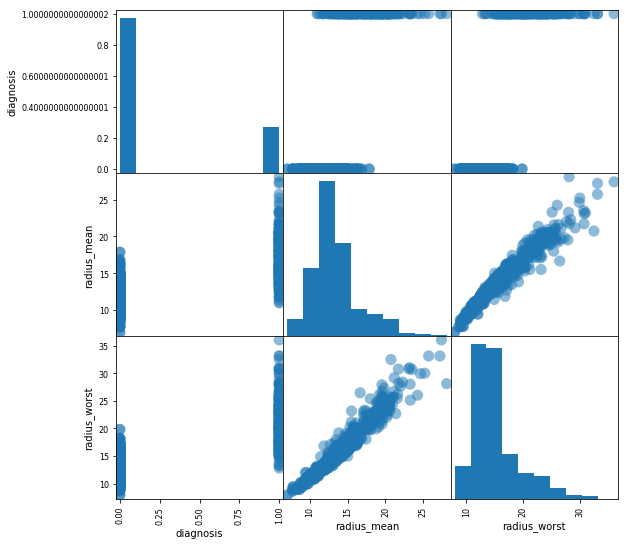

In [13]:
d = pd.DataFrame(dib, columns = ["diagnosis", "radius_mean", "radius_worst"])
d = d.dropna()
print(len(d))
tmp = pd.plotting.scatter_matrix(d, figsize = (9, 9), s = 500) 
y = d["diagnosis"]
x = d[["radius_mean", "radius_worst"]]
x = sm.add_constant(x) 
m = sm.OLS(y, x).fit()  
print(m.summary())

A partir de aquí, se quiere lograr formar un clasificador que prediga la clasificación de diagnostico de una anomalía basandose en los datos que se le alimente de estas dos caracteristicas de radio.

Como se explica en el ejemplo de práctica realizado por la Dra. Elisa, el objetivo de clasificar es el de diagnostico, por lo que lo se coloca en el valor de Y. En el valor de X se colocan las otras dos caracteristicas que ayudarán a formar el clasificador.



In [6]:
d = pd.DataFrame(o, columns = ["diagnosis", "radius_mean", "radius_worst"])
d = d.dropna()
y = d["diagnosis"]
x = d[["radius_mean", "radius_worst"]]
m = sm.OLS(y, x).fit()  
comp = pd.DataFrame(d, columns = ["diagnosis"])
comp['pron'] = m.predict(x) 
print(comp['pron'])
comp['error'] = comp.diagnosis - comp.pron
comp['absE'] = pd.DataFrame.abs(comp['error'])
orden = comp.sort_values(by = ['absE'])
mejores = orden.head(10)
mejores.insert(0, 'tipo', 'mejores')
peores = orden.tail(10)
peores.insert(0, 'tipo', 'peores')
pd.concat([mejores, peores])
n = len(comp)
for e in [.1, .5, 1]:
    k = sum(comp.absE < e)
    print(k, "de", n , "= {:.2f}% estuvieron dentro de".format(100 * k / n), e, "punto del correcto")

0      1.346098
1      0.824218
2      0.726702
3      0.641404
4      0.438694
5      0.560028
6      0.856954
7      0.621027
8      0.467072
9      0.490857
10     0.593593
11     0.853917
12     0.354904
13     0.206509
14     0.257377
15     0.546358
16     0.807422
17     0.888307
18     1.370932
19     0.304907
20     0.277400
21     0.147312
22     0.514208
23     1.462267
24     1.772819
25     0.939949
26     0.567725
27     0.515256
28     0.911527
29     0.467103
         ...   
539    0.190084
540    0.150213
541    0.338652
542    0.342726
543    0.231526
544    0.236360
545    0.333448
546    0.185093
547    0.121109
548    0.240091
549    0.413151
550    0.163082
551    0.179574
552    0.220025
553    0.109013
554    0.204272
555    0.117619
556    0.106721
557    0.207651
558    0.186314
559    0.194507
560    0.249130
561    0.149551
562    0.437688
563    0.638619
564    0.732119
565    0.670788
566    0.454569
567    0.952011
568    0.316002
Name: pron, Length: 569,

Se imprimió la parte de predicción porque necesitaba ver cual era el resultado para darle los datos correctos al siguiente paso, que es el que va a decir si la herramienta que se crea con estos parámetros es suficientemente buena para clasificar las anomalías benignas y malignas.

In [41]:
d = pd.DataFrame(o, columns = ["diagnosis", "radius_mean", "radius_worst"])
d = d.dropna()
y = d["diagnosis"]
x = d[["radius_mean", "radius_worst"]]
m = sm.OLS(y, x).fit() 
print(m.summary())
comp = pd.DataFrame(d, columns = ["diagnosis"])
comp['pron'] = m.predict(x)
comp['error'] = comp.diagnosis - comp.pron
comp['absE'] = pd.DataFrame.abs(comp['error'])
orden = comp.sort_values(by = ['absE'])
mejores = orden.head(10)
mejores.insert(0, 'tipo', 'mejores')
peores = orden.tail(10)
peores.insert(0, 'tipo', 'peores')
pd.concat([mejores, peores])
n = len(comp)
for e in [1, 5, 10]:
    k = sum(comp.absE < e)
    print(k, "de", n , "= {:.2f}% estuvieron dentro de".format(100 * k / n), e, \
          "punto{:s} del CF correcto".format("" if e == 1 else "s"))
fp = sum((comp.diagnosis == 0) & (comp.pron >= .5))
fn = sum((comp.diagnosis == 1) & (comp.pron < .5))
tp = sum((comp.diagnosis == 1) & (comp.pron >= .5))
tn = sum((comp.diagnosis == 0) & (comp.pron < .5))

print('Clasificación')
print(fp, fn, tp, tn)
tt = tp + tn + fp + fn
print('sensibilidad', tp / (tp + fn))
print('especificidad', tn / (tn + fp))
print('precisión', (tp + tn) / tt)

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     617.8
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          3.90e-143
Time:                        15:19:58   Log-Likelihood:                -197.43
No. Observations:                 569   AIC:                             398.9
Df Residuals:                     567   BIC:                             407.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
radius_mean     -0.1755      0.013    -13.927   

Para la medición de eficiencia en cualquier herramienta de aprendizaje de máquina, se tienen la sencibilidad, especificidad, y precisión. Dependiendo de donde se quiera utilizar la herramienta, cada una de estas opciones adquiere mas relevancia. 

Para poder realizar los falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos, se tuvo que actualizar a los valores que se esperan del diagnostico. Trabajando con una base de datos diferente en Keras, esto es lo que hace para poder darme el valor de espeficidad.

En el caso de estos resultados, a pesar de que tiene buena especificidad, también se le tiene que dar importancia a la precisión, ya que esos 63 falsos negativos significa que clasificó a 63 pacientes con que su cáncer era benigno, siendo que el resultado era maligno. 

Claramente, esto en una herramienta de la vida real resultaría muy poco confiable, pero en investigación puede ayudar el tomar otros parámetros tal vez no tal relacionados como lo estaban el 'radius_mean' y el 'radius_worst'